# Hw11

## Завантаження та підготовка датасету

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional
from keras.models import Sequential
from keras.utils import pad_sequences



In [2]:
max_features = 10000
maxlen = 500
batch_size = 256
epochs_num = 10
output_dim=32
units = 32

In [3]:
start_char = 1
oov_char = 2
index_from = 3

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features, maxlen=maxlen,
                                                              start_char=start_char, oov_char=oov_char,
                                                              index_from=index_from)


### Виведення екземпляру рецензії з тренувального датасету у вигляді послідовності чисел

In [5]:
input_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

### Перевірка довжини послідовності

In [6]:
len(input_train[0])

218

### Словник з індексами слів

In [7]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### Зворотний словник

In [8]:

inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

### Декодована рецензія

In [9]:
decoded_sequence = " ".join(inverted_word_index[i] for i in input_train[0])
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [OOV] to the two little boy's that played the [OOV] of norman and paul they were just brilliant children are often left out of the [OOV] list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Додавання нулів(padding) для досягнення однакової для всіх послідовностей довжини

In [10]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


In [11]:
print(input_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Перевірка довжини послідовності після додавання нулів

In [12]:
len(input_train[0])

500

## SimpleRNN модель

In [13]:
from keras.layers import SpatialDropout1D

model = Sequential(name="SimpleRNN")

model.add(Embedding(max_features, output_dim=output_dim))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [15]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('simpleRNN.keras', save_best_only=True, monitor='val_acc', verbose=1)

In [16]:
history = model.fit(input_train, y_train, epochs=epochs_num, batch_size=batch_size, validation_split=0.3, callbacks=[checkpoint])


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 0.5399 - loss: 0.6869
Epoch 1: val_acc improved from -inf to 0.65273, saving model to simpleRNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - acc: 0.5407 - loss: 0.6865 - val_acc: 0.6527 - val_loss: 0.6081
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - acc: 0.7455 - loss: 0.5326
Epoch 2: val_acc improved from 0.65273 to 0.74392, saving model to simpleRNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - acc: 0.7458 - loss: 0.5322 - val_acc: 0.7439 - val_loss: 0.5214
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - acc: 0.8119 - loss: 0.4209
Epoch 3: val_acc improved from 0.74392 to 0.83540, saving model to simpleRNN.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - acc: 0.8121 - loss: 0.4206 - val_acc: 0.8354 - val_loss: 0.3884
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - acc: 0.8536 - loss: 0.3543
Epoch 4: val_acc did not improve from 0.83540
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - acc: 0.8536 - loss: 0.3543 -

## Функція візуалізації результатів

In [17]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'r--', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
    plt.xlabel('Кількість епох')
    plt.ylabel('Точність')
    plt.title(f'Точність тренування і валідації моделі {history.model.name}')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r--', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
    plt.xlabel('Кількість епох')
    plt.ylabel('Втрати')
    plt.title(f'Втрати тренування і валідації моделі {history.model.name}')
    plt.legend()

    plt.show()

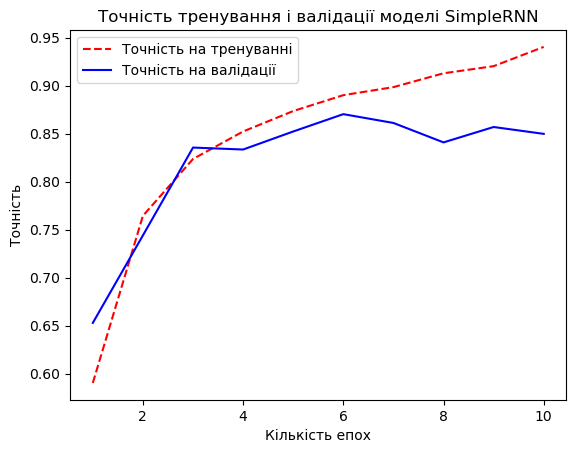

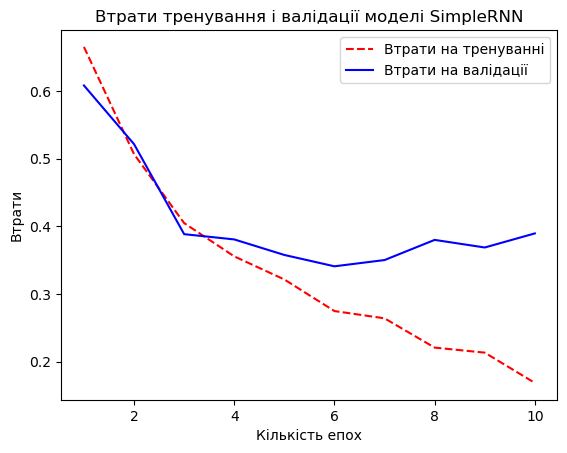

In [18]:
plot_history(history)

In [19]:
compare_models = dict()

In [20]:
from keras.models import load_model

best_model_RNN = load_model('simpleRNN.keras')
loss, acc = best_model_RNN.evaluate(input_test, y_test)
compare_models[best_model_RNN.name] = acc, loss
print(f"Точність на тестових даних: {acc:.3f}")

721/721 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8626 - loss: 0.3551
Точність на тестових даних: 0.863


In [21]:
def check_prediction(model,start=0, n=10):
    predicted = model.predict(input_test)
    print(f"Передбачення моделі {model.name} для {n-start} рецензій, починаючи з {start}:\n")
    print(f"P | L | Res")
    for p, l in zip(predicted, y_test[start:n]):
        print("-" * 12)
        print(round(p[0]), "|", l, "|", round(p[0]) == l)


check_prediction(model,0, 10)


721/721 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step
Передбачення моделі SimpleRNN для 10 рецензій, починаючи з 0:

P | L | Res
------------
0 | 0 | True
------------
1 | 1 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
0 | 1 | False
------------
0 | 0 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
1 | 1 | True
------------
0 | 0 | True


## LSTM 

In [22]:
lstm_model = Sequential(name="LSTM")

lstm_model.add(Embedding(max_features, output_dim=output_dim))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(units, dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [23]:
checkpoint = ModelCheckpoint('lstm.keras', save_best_only=True, monitor='val_acc', verbose=1)

In [24]:
lstm_history = lstm_model.fit(input_train, y_train, epochs=epochs_num, batch_size=batch_size, validation_split=0.3, callbacks=[checkpoint])

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - acc: 0.5351 - loss: 0.6906
Epoch 1: val_acc improved from -inf to 0.69206, saving model to lstm.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 385ms/step - acc: 0.5356 - loss: 0.6905 - val_acc: 0.6921 - val_loss: 0.6166
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - acc: 0.6971 - loss: 0.5892
Epoch 2: val_acc improved from 0.69206 to 0.79286, saving model to lstm.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 434ms/step - acc: 0.6976 - loss: 0.5886 - val_acc: 0.7929 - val_loss: 0.4697
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - acc: 0.7985 - loss: 0.4501
Epoch 3: val_acc improved from 0.79286 to 0.83554, saving model to lstm.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 444ms/step - acc: 0.7986 - loss: 0.4499 - val_acc: 0.8355 - val_loss: 0.3804
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - acc: 0.8331 - loss: 0.3865
Epoch 4: val_acc improved from 0.83554 to 0.85666, saving model to lstm.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 463ms/step -

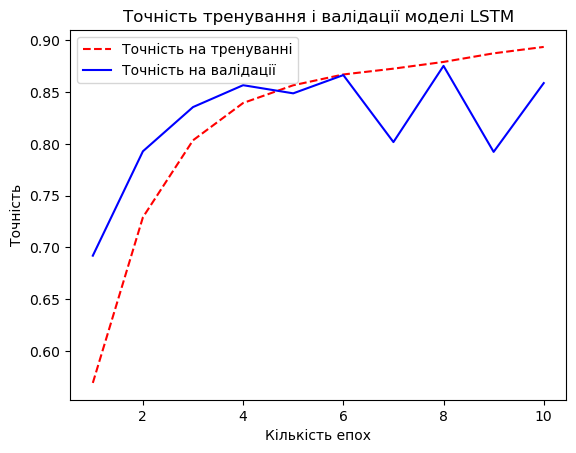

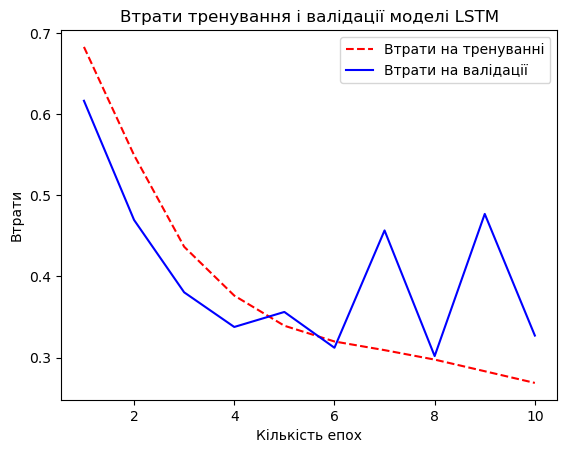

In [25]:
plot_history(lstm_history)

In [26]:
lstm_best_model = load_model('lstm.keras')
loss, acc = lstm_best_model.evaluate(input_test, y_test)
compare_models[lstm_best_model.name] = acc, loss
print(f"Точність на тестових даних: {acc:.3f}")

721/721 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - acc: 0.8755 - loss: 0.3064
Точність на тестових даних: 0.877


In [27]:
check_prediction(lstm_best_model)

721/721 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step
Передбачення моделі LSTM для 10 рецензій, починаючи з 0:

P | L | Res
------------
0 | 0 | True
------------
1 | 1 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
1 | 1 | True
------------
0 | 0 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
1 | 1 | True
------------
0 | 0 | True


# Bidirectional LSTM

In [28]:
lstm_bidirectional_model = Sequential(name="BidirectLSTM")

lstm_bidirectional_model.add(Embedding(max_features, output_dim=output_dim))
lstm_bidirectional_model.add(SpatialDropout1D(0.2))
lstm_bidirectional_model.add(Bidirectional(LSTM(units, dropout=0.2)))
lstm_bidirectional_model.add(Dense(1, activation='sigmoid'))

lstm_bidirectional_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [29]:
checkpoint = ModelCheckpoint('lstm_bidirectional.keras', save_best_only=True, monitor='val_acc',
                             verbose=1)

In [30]:
lstm_bidirectional_history = lstm_bidirectional_model.fit(input_train, y_train, epochs=epochs_num,
                                                          batch_size=batch_size, validation_split=0.3,
                                                          callbacks=[checkpoint])

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5156 - loss: 0.6928
Epoch 1: val_acc improved from -inf to 0.55193, saving model to lstm_bidirectional.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.5158 - loss: 0.6927 - val_acc: 0.5519 - val_loss: 0.6887
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6126 - loss: 0.6656
Epoch 2: val_acc improved from 0.55193 to 0.77888, saving model to lstm_bidirectional.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - acc: 0.6133 - loss: 0.6650 - val_acc: 0.7789 - val_loss: 0.5314
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7579 - loss: 0.5200
Epoch 3: val_acc improved from 0.77888 to 0.79636, saving model to lstm_bidirectional.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - acc: 0.7582 - loss: 0.5196 - val_acc: 0.7964 - val_loss: 0.4559
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8066 - loss: 0.4365
Epoch 4: val_acc improved from 0.79636 to 0.80291, saving model to lstm_bidirectional.keras
63/63 ━━

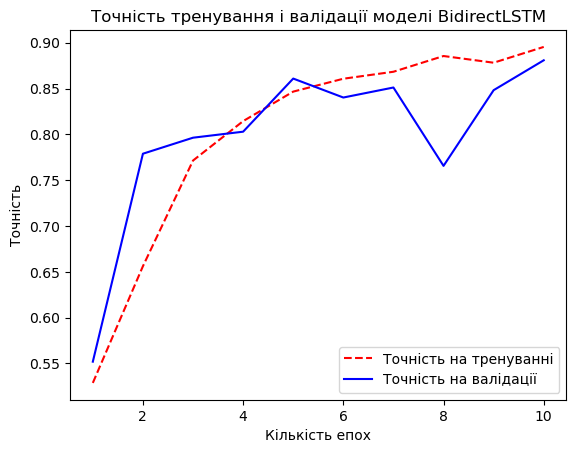

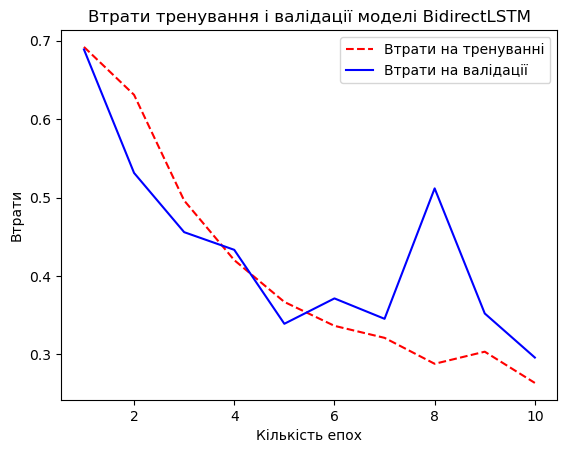

In [31]:
plot_history(lstm_bidirectional_history)

In [32]:
lstm_bidirectional_best_model = load_model('lstm_bidirectional.keras')

In [33]:
loss, acc = lstm_bidirectional_model.evaluate(input_test, y_test)
compare_models[lstm_bidirectional_best_model.name] = acc, loss
print(f"Точність на тестових даних: {acc:.3f}")

721/721 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.8744 - loss: 0.3045
Точність на тестових даних: 0.876


In [34]:
check_prediction(lstm_bidirectional_best_model)

721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step
Передбачення моделі BidirectLSTM для 10 рецензій, починаючи з 0:

P | L | Res
------------
0 | 0 | True
------------
1 | 1 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
1 | 1 | True
------------
0 | 0 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
1 | 1 | True
------------
0 | 0 | True


## Deep LSTM

In [35]:
lstm_deep_model = Sequential(name="DeepLSTM")

lstm_deep_model.add(Embedding(max_features, output_dim=output_dim))
lstm_deep_model.add(SpatialDropout1D(0.2))
lstm_deep_model.add(LSTM(units, return_sequences=True))
lstm_deep_model.add(LSTM(units))
lstm_deep_model.add(Dense(1, activation='sigmoid'))

lstm_deep_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [36]:
checkpoint = ModelCheckpoint('lstm_deep.keras', save_best_only=True, monitor='val_acc', verbose=1)

In [37]:
lstm_deep_history = lstm_deep_model.fit(input_train, y_train, epochs=epochs_num, batch_size=batch_size,
                                        validation_split=0.3, callbacks=[checkpoint])

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5269 - loss: 0.6923
Epoch 1: val_acc improved from -inf to 0.65899, saving model to lstm_deep.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.5273 - loss: 0.6922 - val_acc: 0.6590 - val_loss: 0.6186
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6781 - loss: 0.6065
Epoch 2: val_acc improved from 0.65899 to 0.78077, saving model to lstm_deep.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc: 0.6786 - loss: 0.6059 - val_acc: 0.7808 - val_loss: 0.4852
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7873 - loss: 0.4603
Epoch 3: val_acc improved from 0.78077 to 0.80422, saving model to lstm_deep.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc: 0.7874 - loss: 0.4602 - val_acc: 0.8042 - val_loss: 0.4299
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8289 - loss: 0.3973
Epoch 4: val_acc improved from 0.80422 to 0.84020, saving model to lstm_deep.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - acc

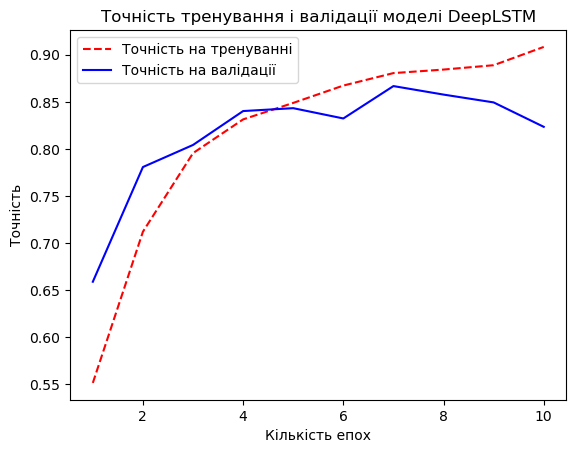

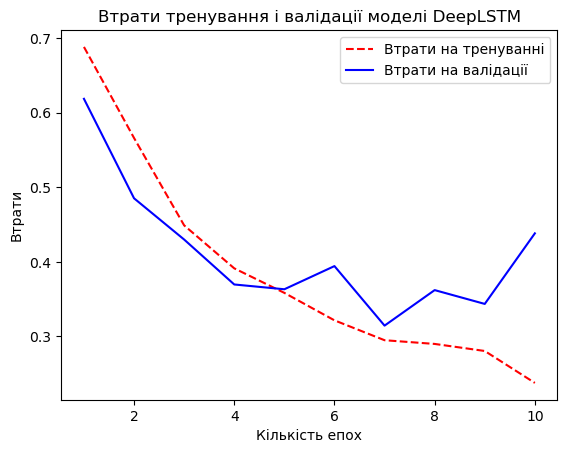

In [38]:
plot_history(lstm_deep_history)

In [39]:
lstm_deep_best_model = load_model('lstm_deep.keras')
loss, acc = lstm_deep_model.evaluate(input_test, y_test)
compare_models[lstm_deep_best_model.name] = acc, loss
print(f"Точність на тестових даних: {acc:.3f}")

721/721 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - acc: 0.8200 - loss: 0.4493
Точність на тестових даних: 0.819


In [40]:
check_prediction(lstm_deep_best_model)

721/721 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step
Передбачення моделі DeepLSTM для 10 рецензій, починаючи з 0:

P | L | Res
------------
0 | 0 | True
------------
1 | 1 | True
------------
0 | 0 | True
------------
1 | 1 | True
------------
0 | 1 | False
------------
0 | 0 | True
------------
1 | 0 | False
------------
1 | 1 | True
------------
1 | 1 | True
------------
0 | 0 | True


## Порівняння моделей

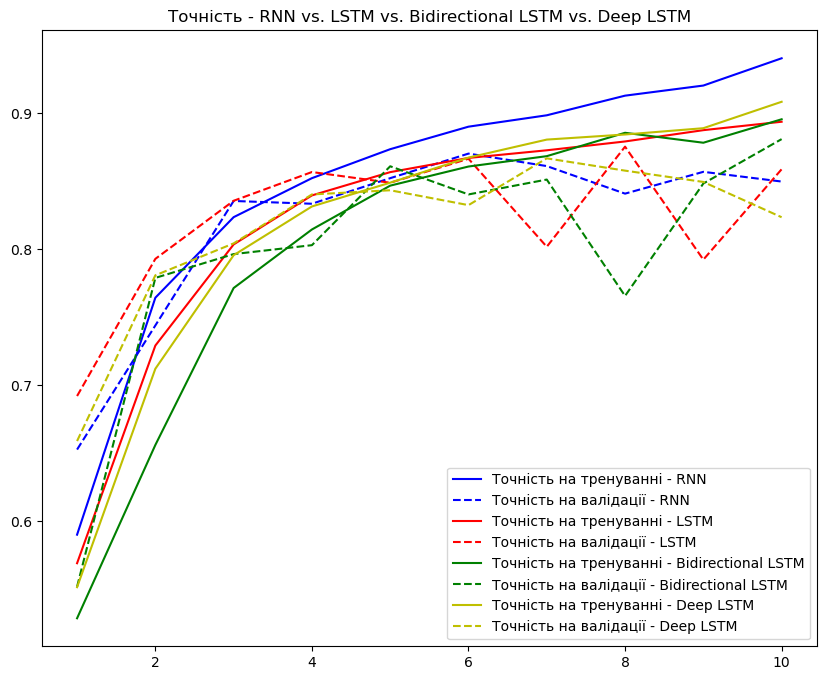

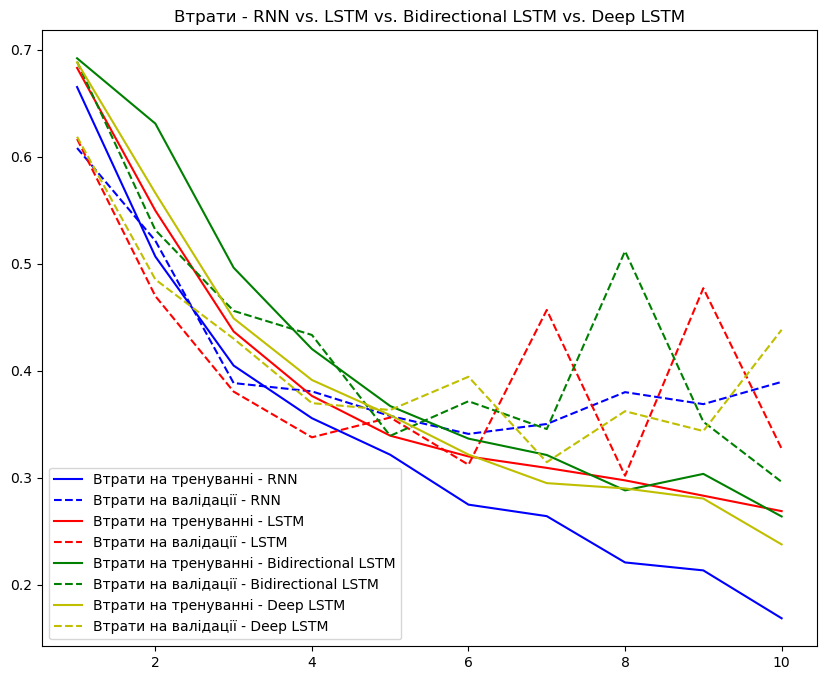

In [41]:
acc_rnn = history.history['acc']
loss_rnn = history.history['loss']
acc_rnn_val = history.history['val_acc']
loss_rnn_val = history.history['val_loss']

acc_lstm = lstm_history.history['acc']
loss_lstm = lstm_history.history['loss']
acc_lstm_val = lstm_history.history['val_acc']
loss_lstm_val = lstm_history.history['val_loss']

acc_bidirectional = lstm_bidirectional_history.history['acc']
loss_bidirectional = lstm_bidirectional_history.history['loss']
acc_bidirectional_val = lstm_bidirectional_history.history['val_acc']
loss_bidirectional_val = lstm_bidirectional_history.history['val_loss']

acc_deep = lstm_deep_history.history['acc']
loss_deep = lstm_deep_history.history['loss']
acc_deep_val = lstm_deep_history.history['val_acc']
loss_deep_val = lstm_deep_history.history['val_loss']

epochs = range(1, len(acc_rnn) + 1)
plt.figure(figsize=(10, 8))
plt.plot(epochs, acc_rnn, 'b', label='Точність на тренуванні - RNN')
plt.plot(epochs, acc_rnn_val, 'b--', label='Точність на валідації - RNN')
plt.plot(epochs, acc_lstm, 'r', label='Точність на тренуванні - LSTM')
plt.plot(epochs, acc_lstm_val, 'r--', label='Точність на валідації - LSTM')
plt.plot(epochs, acc_bidirectional, 'g', label='Точність на тренуванні - Bidirectional LSTM')
plt.plot(epochs, acc_bidirectional_val, 'g--', label='Точність на валідації - Bidirectional LSTM')
plt.plot(epochs, acc_deep, 'y', label='Точність на тренуванні - Deep LSTM')
plt.plot(epochs, acc_deep_val, 'y--', label='Точність на валідації - Deep LSTM')
plt.title('Точність - RNN vs. LSTM vs. Bidirectional LSTM vs. Deep LSTM')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 8))

plt.plot(epochs, loss_rnn, 'b', label='Втрати на тренуванні - RNN')
plt.plot(epochs, loss_rnn_val, 'b--', label='Втрати на валідації - RNN')  # Графік втрат на тренувальних данних
plt.plot(epochs, loss_lstm, 'r', label='Втрати на тренуванні - LSTM')
plt.plot(epochs, loss_lstm_val, 'r--', label='Втрати на валідації - LSTM')
plt.plot(epochs, loss_bidirectional, 'g', label='Втрати на тренуванні - Bidirectional LSTM')
plt.plot(epochs, loss_bidirectional_val, 'g--', label='Втрати на валідації - Bidirectional LSTM')  #
plt.plot(epochs, loss_deep, 'y', label='Втрати на тренуванні - Deep LSTM')
plt.plot(epochs, loss_deep_val, 'y--', label='Втрати на валідації - Deep LSTM')  # Графік втрат на валідаційних данних
plt.title('Втрати - RNN vs. LSTM vs. Bidirectional LSTM vs. Deep LSTM')  # Заголовок графіку
plt.legend(loc='lower left')  # Показати легенду

plt.show()  # Відобразити графіки

In [42]:
import pandas as pd
df = pd.DataFrame(compare_models).T
df.columns = ['Accuracy', 'Loss']
df

,Accuracy,Loss
SimpleRNN,0.862909,0.354870
LSTM,0.876653,0.303123
BidirectLSTM,0.876133,0.300903
DeepLSTM,0.818730,0.451621


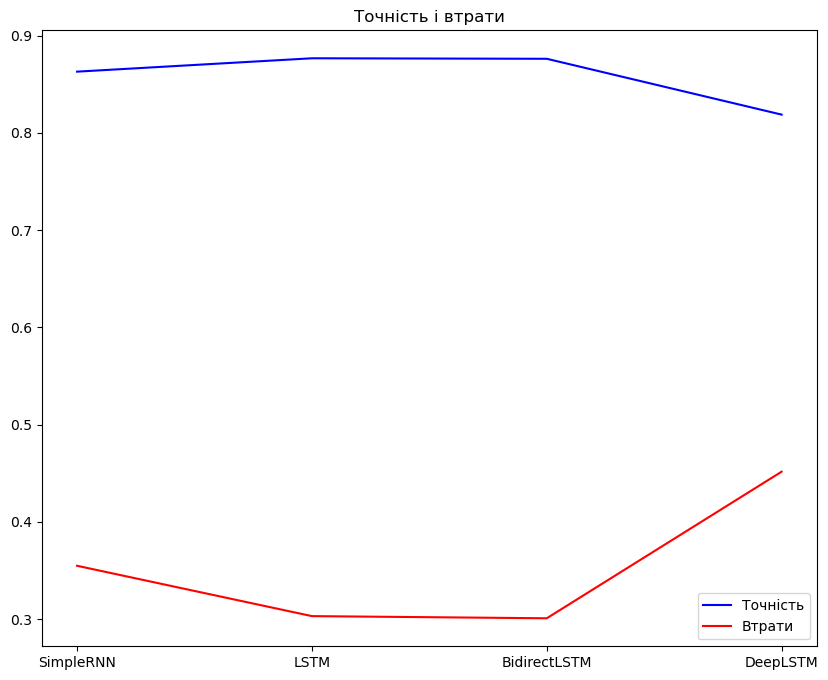

In [43]:
plt.figure(figsize=(10, 8))

plt.plot(df.index, df['Accuracy'], 'b', label='Точність')
plt.plot(df.index, df['Loss'], 'r', label='Втрати')
plt.title('Точність і втрати')
plt.legend(loc='lower right')
plt.show()

## Висновки: 
При заданих гіперпараметрах на графіках можна помітити, що звичайна RNN має найбільш круті криві навчання на навчальних даних, але з кожною епохою вони все більше і більше розходяться з результатами, отриманими на валідаційних даних, тобто з усіх моделей ця демонструє найбільшу тенденцію до перенавчання. LSTM та Bidirectional LSTM показуються дуже близькі одна до одної результати на тренувальних даних. Криві навчання на тестових даних відрізняються від RNN меншою консистентністю. Вони мають характерний вигляд ламаної лінії, що то віддаляється від тренувальної лінії, то наближається до неї. Але загальна тенденція зростаюча і, можливо, є перспектива зростання при збільшенні кількості епох. При цьому  Bidirectional LSTM потребує набагато більше часу, ніж однонаправлені моделі. 
Щодо Deep LSTM, то при заданих гіперпараметрах вона показала найгірші результати при найгіршій продуктивності. Можливо для неї потрібно більше уваги приділити підбору гіперпараметрів, або ж вона не дуже підходить саме для даної задачі.